Fast Fourier Transform using Decimation in Time Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

input sequencce:  [1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j]
x: [1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j 0.+0.j 0.+0.j 0.+0.j]
FFT:  [15.        +0.j         -5.41421356-7.24264069j  3.        +2.j
 -2.58578644-1.24264069j  3.        +0.j         -2.58578644+1.24264069j
  3.        -2.j         -5.41421356+7.24264069j]
In built: [15.        +0.j         -5.41421356-7.24264069j  3.        +2.j
 -2.58578644-1.24264069j  3.        +0.j         -2.58578644+1.24264069j
  3.        -2.j         -5.41421356+7.24264069j]


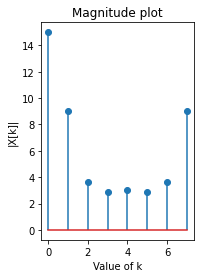

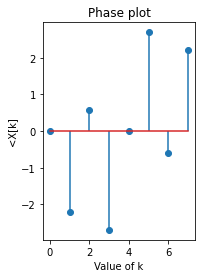

In [2]:
def bitrev(intg,n):
    bi=bin(intg)[2:] #'0b0' to '0'
    if len(bi)!=n:
        bi=bi.zfill(n)  #to make '0' to '000'
    bi=bi[::-1] #to bit reverse
    j=int(bi,2) #binary to int
    return j

x=np.array(input("Enter sequence: ").split(",")).astype(complex)
print("input sequencce: ",x)
n=math.log2(len(x))
n=math.ceil(n) # to find n in N=2^n
N=2**n  #N-point
if len(x)!=N:
    x=np.pad(x,(0,N-len(x)))
print("x:",x)
x1=np.zeros(len(x),complex)
for i in range (N):
    j=bitrev(i,n)
    x1[j]=x[i]  #x1 is in bit reverse order of x
#print("x1 is ",x1)
y=x1
stage=n
half=1
for i in range(int(stage)):
    v=2**(stage-i-1)
    for index in range(0,int(N),2**(i+1)):
        for n in range(half):
            p=n+index
            w=np.exp(-1j*2*math.pi*v*n/N)
            a=x1[p]+x1[p+half]*w
            b=x1[p]-x1[p+half]*w
            x1[p]=a
            x1[p+half]=b
    half=2*half
print("FFT: ",x1)
y1=(np.fft.fft(x))
print("In built:",y1)
#magnitude plot
k_array=np.arange(0,len(x1),1)
mag_y=[abs(i) for i in x1]
plt.subplot(1,2,1)
plt.stem(k_array,mag_y)
plt.title("Magnitude plot")
plt.xlabel("Value of k")
plt.ylabel("|X[k]|")
plt.show()
#phase plot
k_array=np.arange(0,len(x1),1)
phase_y=[cmath.phase(i) for i in x1]
plt.subplot(1,2,2)
plt.stem(k_array,phase_y)
plt.title("Phase plot")
plt.xlabel("Value of k")
plt.ylabel("<X[k]")
plt.show()